# dag 6 - ochtend

#### Importeer de juiste libraries

In [68]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from random import sample

%matplotlib inline

#### Laad en bekijk de data

In [69]:
data = pd.read_csv('airlinesatisfaction.csv')

In [93]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,3,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,3,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,3,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,3,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,3,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [70]:
list(data.columns)

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

Verwijder de kolommen waarvan de titel niet aangeeft wat de feature betekent. 

In [71]:
data = data.drop(columns = ["Unnamed: 0", "id"], axis=1) 
#Unnamed is in dit geval het nummer die ze hebben aan de klanten hebben gekoppelt om het aantal klanten te tellen

In [72]:
list(data.columns)

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [74]:
#Voor alles wat geen dataType is, moeten we zelf een datatype "assignen"
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

In [94]:
data.info() #hoewel men misschien verwacht dat de Dtype een bool wordt, wordt het een int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

#### Plot histogrammen

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <A

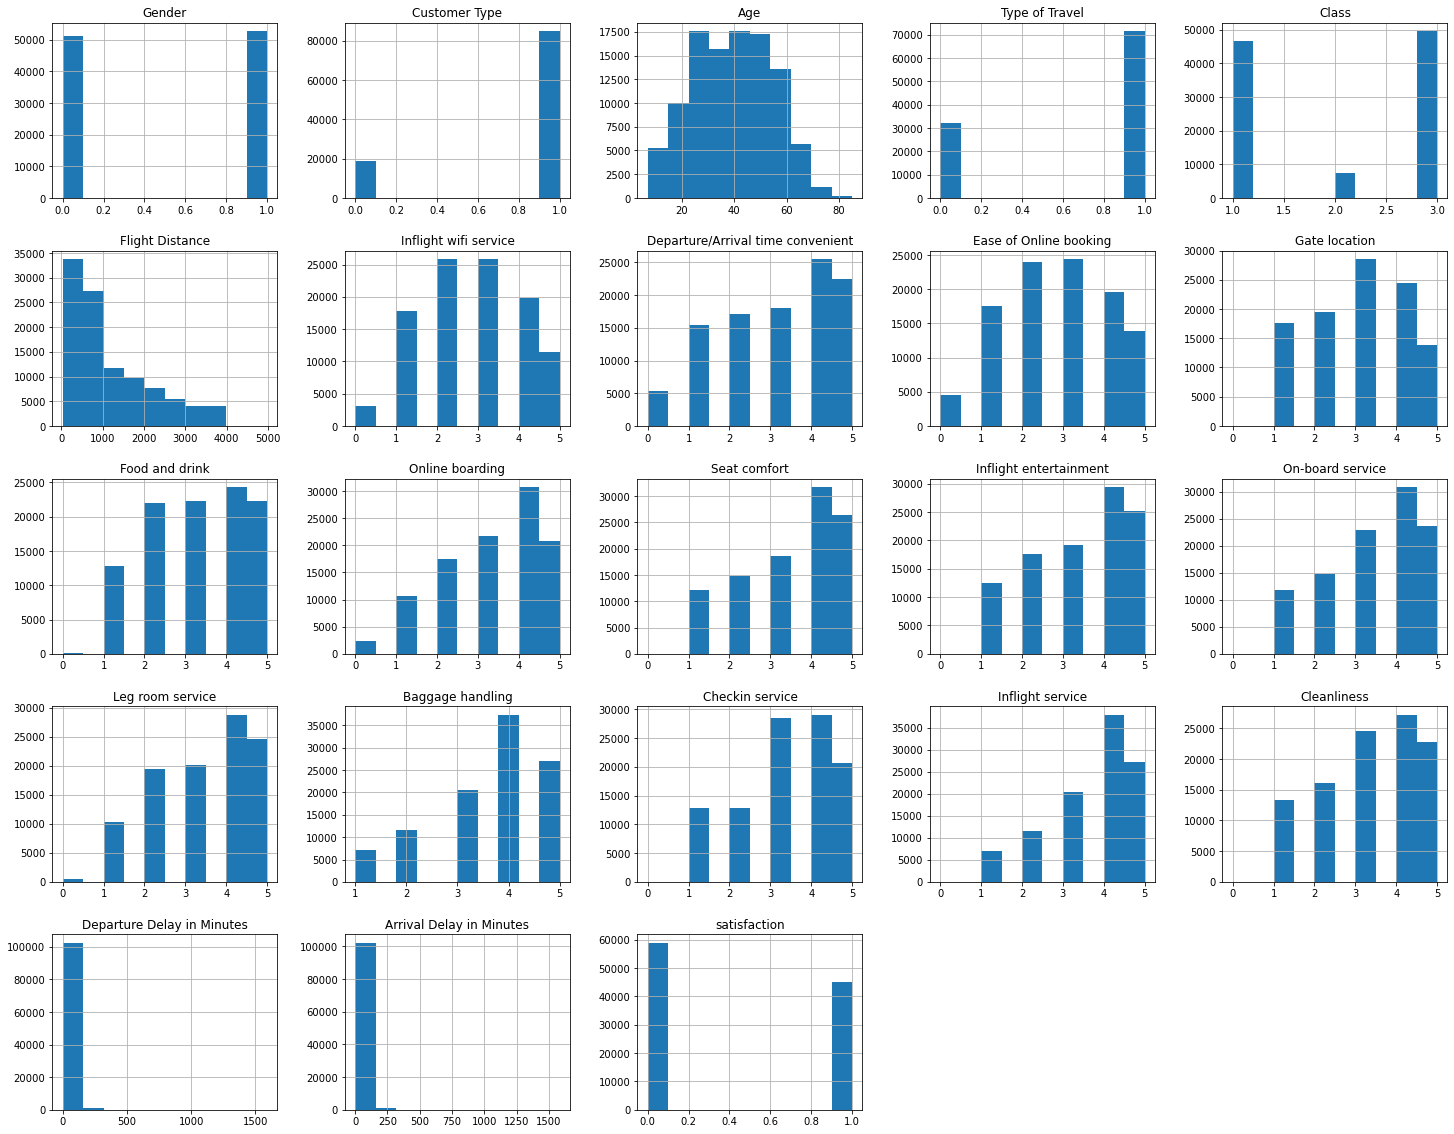

In [111]:
# Als je alle data tegelijk wil plotten:
data.hist(bins = 10, figsize = (25,20))

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

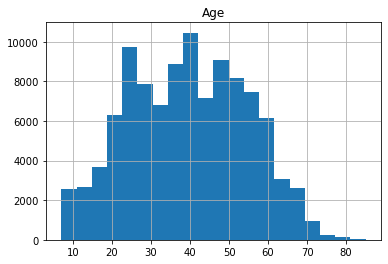

In [113]:
# Als je maar 1 rij wil plotten (x23 dan, dus niet erg handig)
data.hist(column = "Age", bins = 20)

<AxesSubplot:xlabel='Age'>

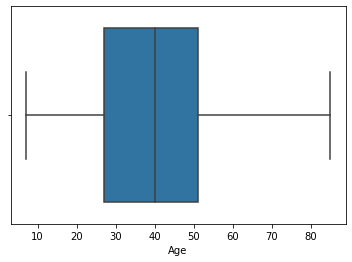

In [115]:
#Boxplotten moet met seaborn:
import seaborn as sns

sns.boxplot(x=data['Age'])

<AxesSubplot:xlabel='Flight Distance'>

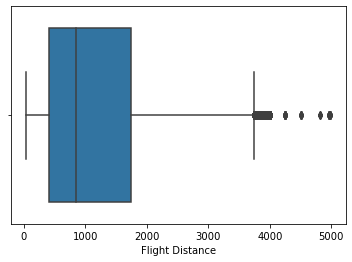

In [116]:
sns.boxplot(x=data['Flight Distance'])

<AxesSubplot:xlabel='Departure Delay in Minutes'>

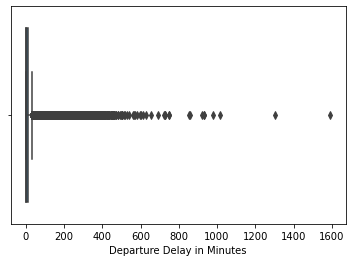

In [117]:
sns.boxplot(x=data['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

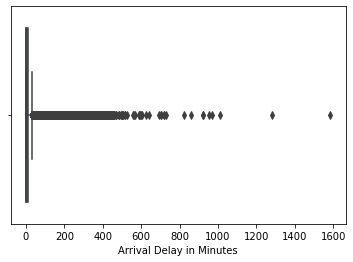

In [118]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

#### Check of de data normaal verdeeld is.

In [106]:
#Ik test het met smirnov
stats.kstest(data['Age'], stats.norm.cdf)

KstestResult(statistic=0.9999999999987201, pvalue=0.0)

In [107]:
stats.kstest(data['Flight Distance'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [108]:
stats.kstest(data['Departure Delay in Minutes'], stats.norm.cdf)

KstestResult(statistic=0.5, pvalue=0.0)

In [109]:
stats.kstest(data['Arrival Delay in Minutes'], stats.norm.cdf) # Hier krijgen we een pvalue van: nan

KstestResult(statistic=nan, pvalue=nan)

#### Zet de features om in z-scores (normaliseren)

In [83]:
print(data[0:5])
scaler = StandardScaler()
data_z = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
print(data_z[0:5])

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              1   13               0      2              460   
1       0              0   25               1      3              235   
2       1              1   26               1      3             1142   
3       1              1   25               1      3              562   
4       0              1   61               1      3              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3           

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <A

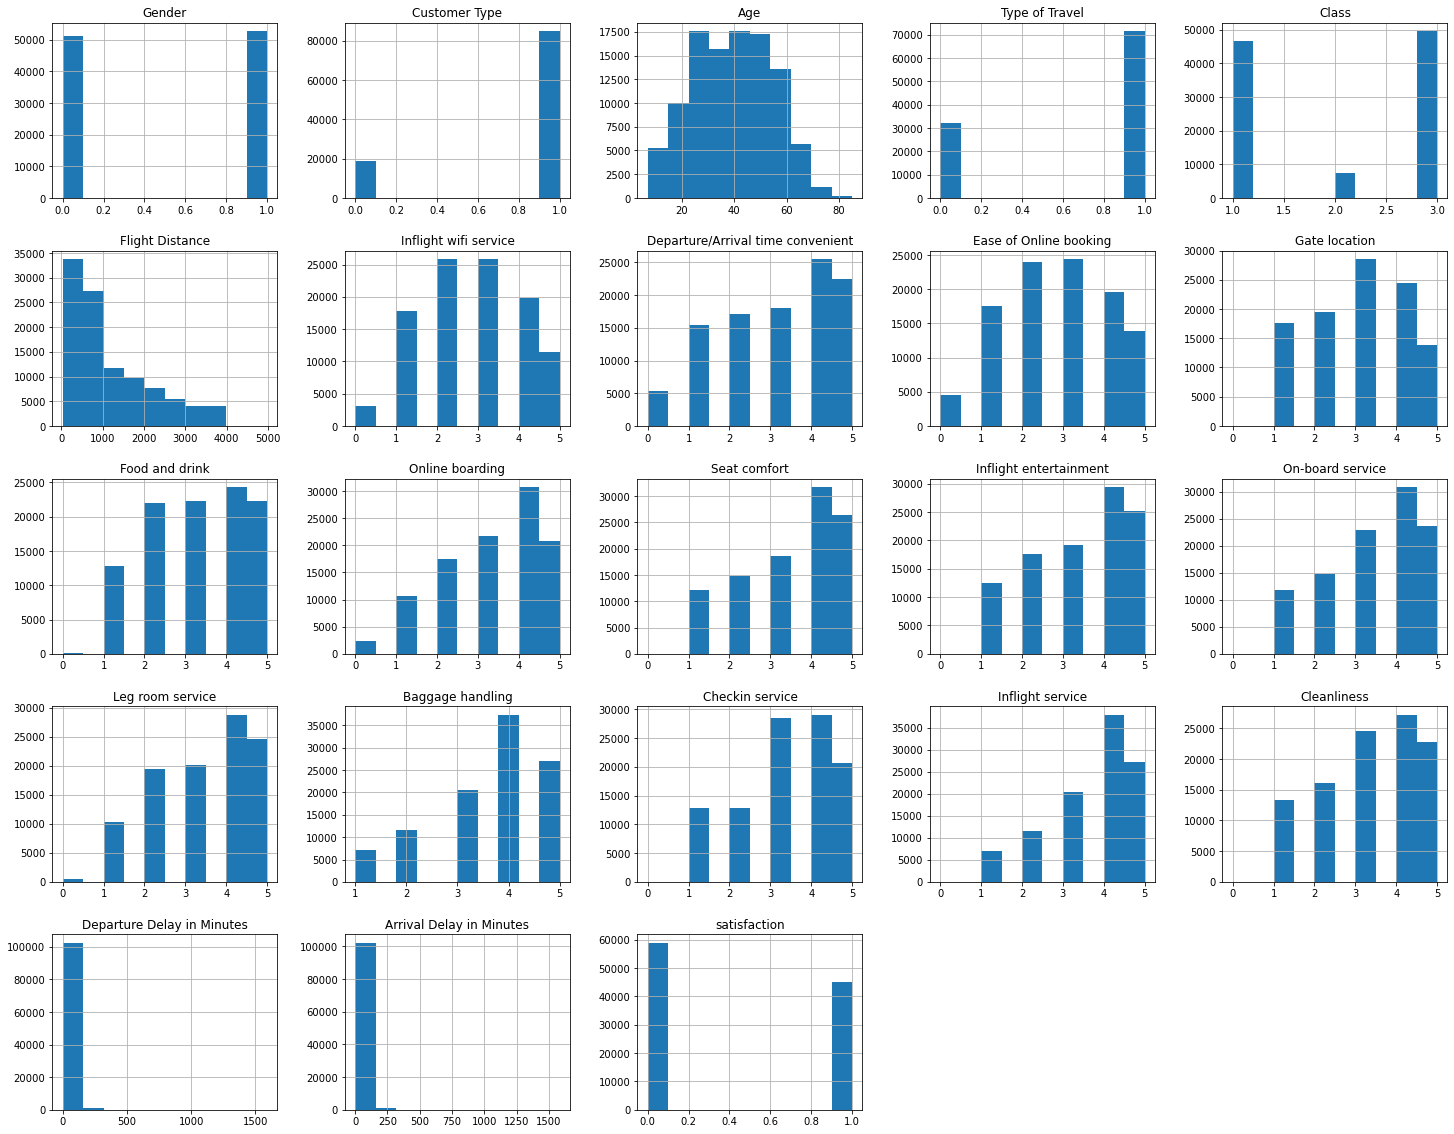

In [122]:
#Nu met de z scores plotten:
data.hist(bins = 10, figsize = (25,20))

#### Maak heatmap en scatter matrix

<AxesSubplot:>

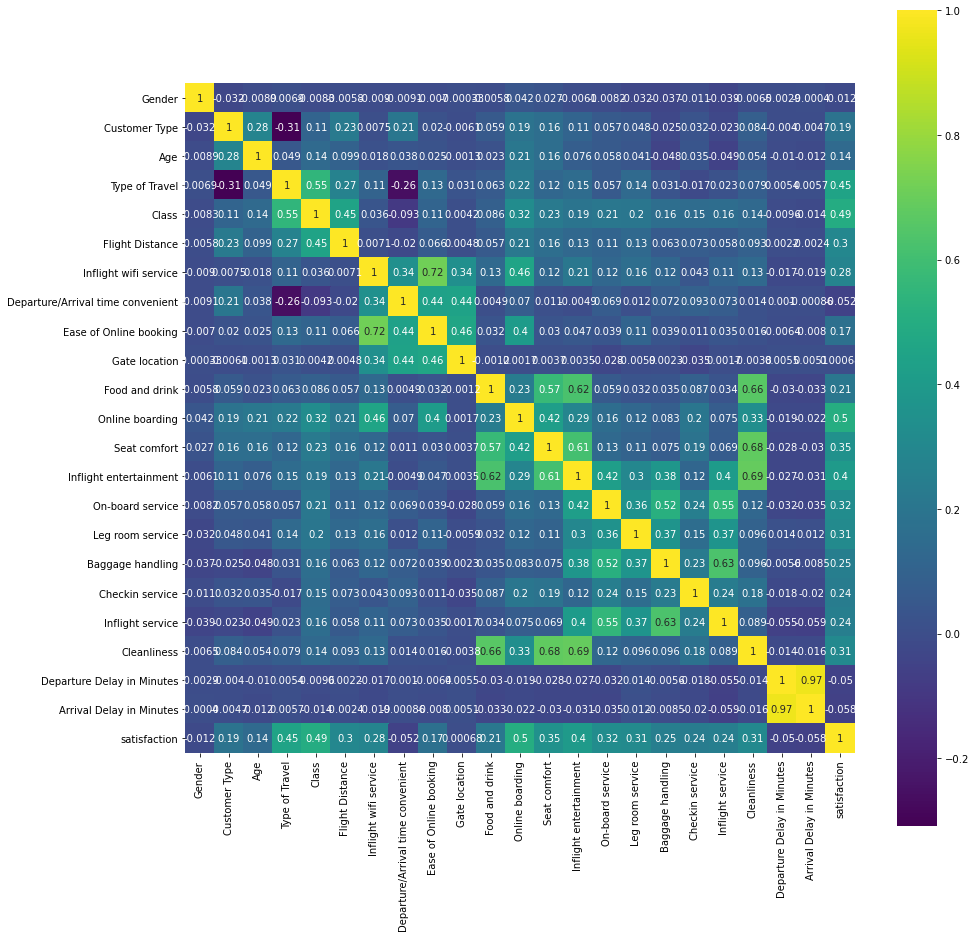

In [126]:
# Heatmap (zonder z-scores)
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, square = True, cmap='viridis')

<AxesSubplot:>

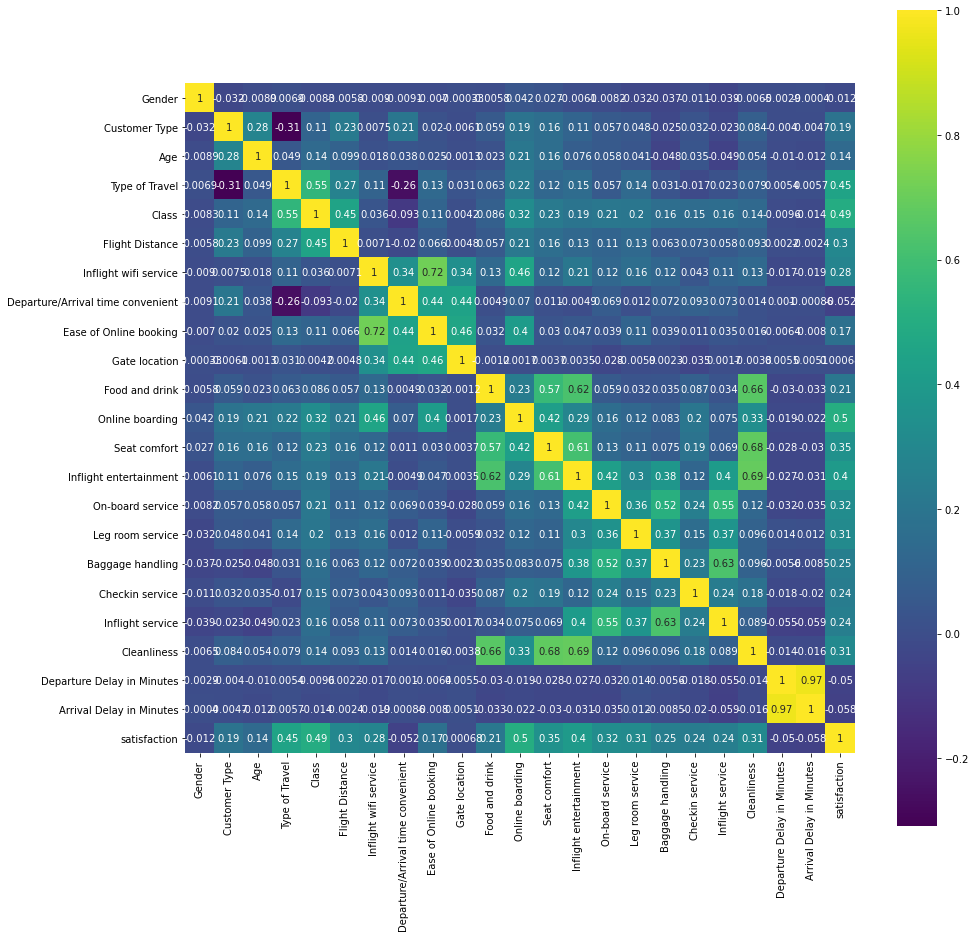

In [125]:
# Heatmap met z-scores
plt.figure(figsize = (15, 15))
sns.heatmap(data_z.corr(), annot = True, square = True, cmap='viridis')

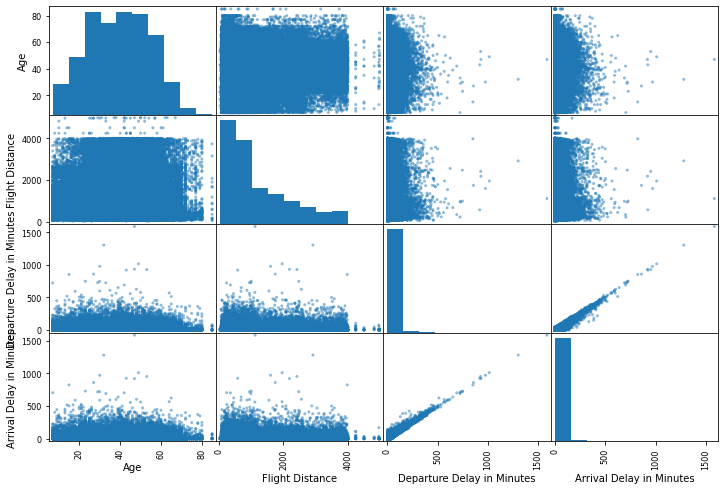

In [88]:
# Scatter matrix (geen z-scores)
attributes = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(data[attributes], figsize = (12, 8))
plt.show()

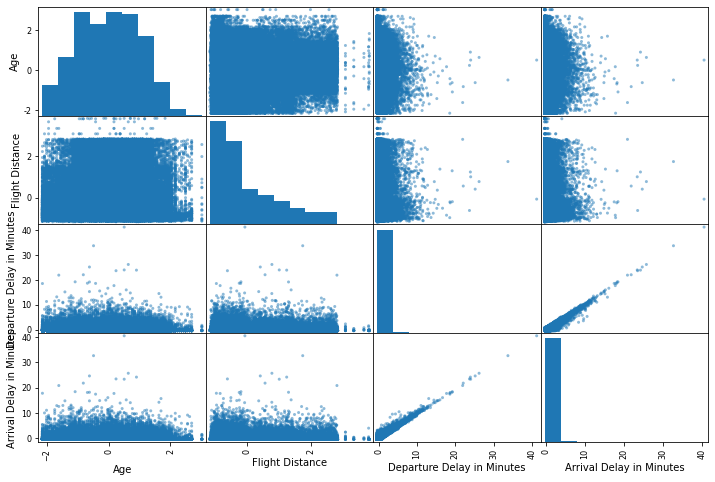

In [89]:
# Scatter matrix (met z-scores)
attributes = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(data_z[attributes], figsize = (12, 8))
plt.show()

In [90]:
# Correlatie
corr_matrix = data.corr()
print(corr_matrix["Arrival Delay in Minutes"]) # Voor de correlatie met 1 variabele
#print(corr_matrix) # Voor de hele matrix

Gender                              -0.000396
Customer Type                       -0.004747
Age                                 -0.012147
Type of Travel                       0.005683
Class                               -0.013674
Flight Distance                     -0.002426
Inflight wifi service               -0.019095
Departure/Arrival time convenient   -0.000864
Ease of Online booking              -0.007984
Gate location                        0.005143
Food and drink                      -0.032524
Online boarding                     -0.021949
Seat comfort                        -0.029900
Inflight entertainment              -0.030703
On-board service                    -0.035227
Leg room service                     0.011843
Baggage handling                    -0.008542
Checkin service                     -0.020369
Inflight service                    -0.059196
Cleanliness                         -0.015774
Departure Delay in Minutes           0.965481
Arrival Delay in Minutes          

In [91]:
print(corr_matrix) 
# Voor de hele matrix

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.031732 -0.008928   
Customer Type                     -0.031732       1.000000  0.281674   
Age                               -0.008928       0.281674  1.000000   
Type of Travel                     0.006909      -0.308333  0.048524   
Class                             -0.008253       0.105735  0.140565   
Flight Distance                   -0.005828       0.225200  0.099461   
Inflight wifi service             -0.008974       0.007543  0.017859   
Departure/Arrival time convenient -0.009142       0.206869  0.038125   
Ease of Online booking            -0.006951       0.019509  0.024842   
Gate location                     -0.000333      -0.006078 -0.001330   
Food and drink                    -0.005772       0.059454  0.023000   
Online boarding                    0.042260       0.189262  0.208939   
Seat comfort                       0.026502       0.159484  0.16